In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
from pandas.plotting import table
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [44]:
data=pd.read_csv('Pokemon.csv')
data=data.drop(columns=['#'])
data.head(2)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [45]:
data=data.rename(columns={'Type 1':'Type_1','Type 2':'Type_2','Sp. Atk':'SpAtk','Sp. Def':'SpDef'})
data.columns

Index(['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'SpAtk',
       'SpDef', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [6]:
data.Generation.value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [18]:
data.Type_1.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type_1, dtype: int64

In [19]:
data.Type_2.value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Rock        14
Ghost       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type_2, dtype: int64

In [21]:
#create a dataset for the number of pokemon in each generation
generations = pd.DataFrame ({'count': data.Generation.value_counts().sort_index()})
generations 

,count
1,166
2,106
3,160
4,121
5,165
6,82


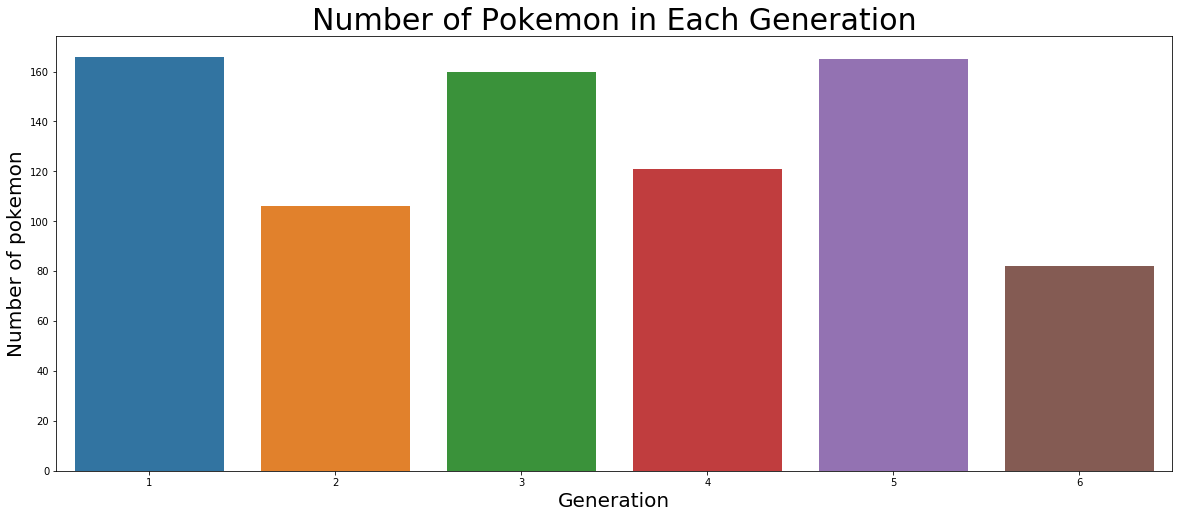

In [23]:
plt.figure (figsize = (20, 8))
sns.barplot (x = generations.index, y = generations['count'])
plt.title ('Number of Pokemon in Each Generation', fontdict = {'fontsize': 30})
plt.xlabel ('Generation', fontdict = {'fontsize': 20})
plt.ylabel ('Number of pokemon', fontdict = {'fontsize': 20})
plt.show()

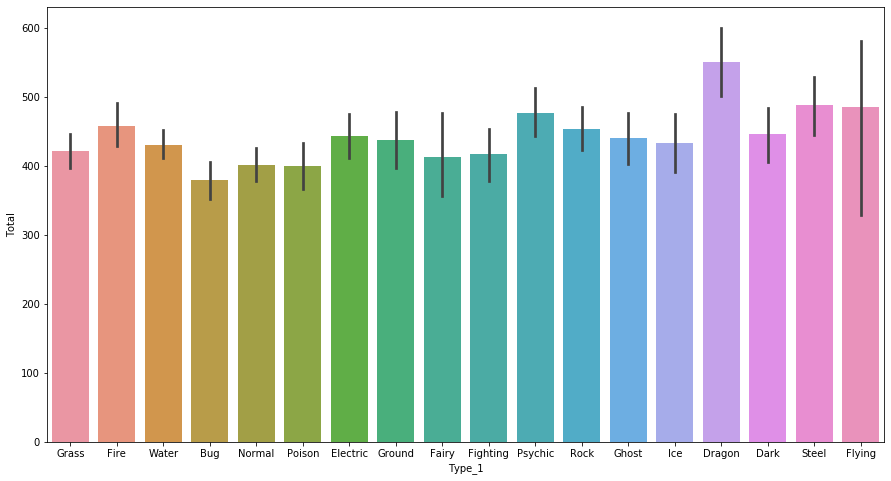

In [52]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_1',y='Total',data=data)
plt.show()

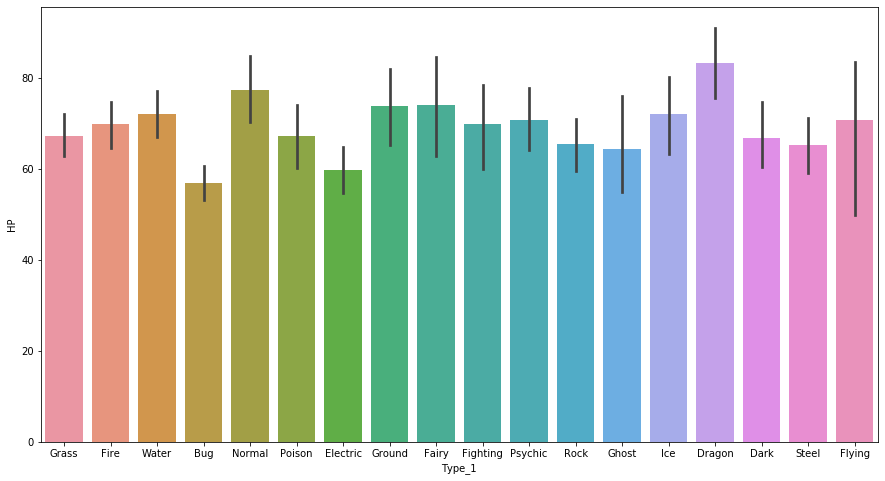

In [53]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_1',y='HP',data=data)
plt.show()

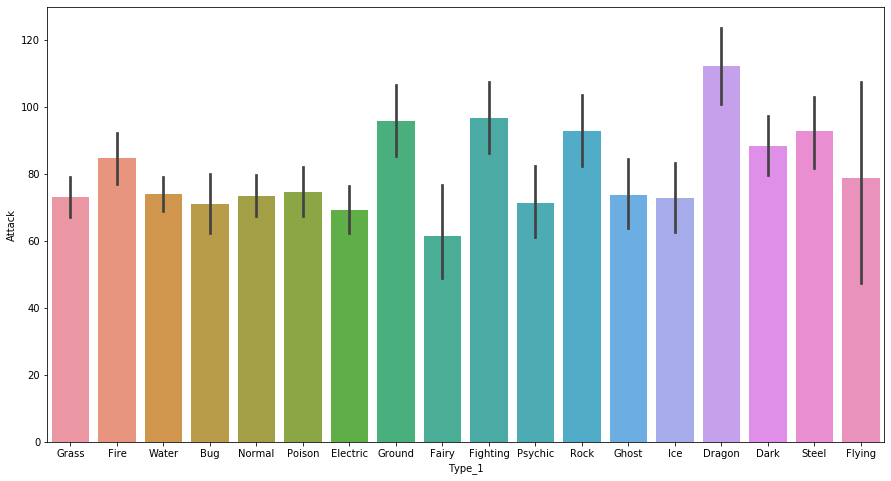

In [54]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_1',y='Attack',data=data)
plt.show()

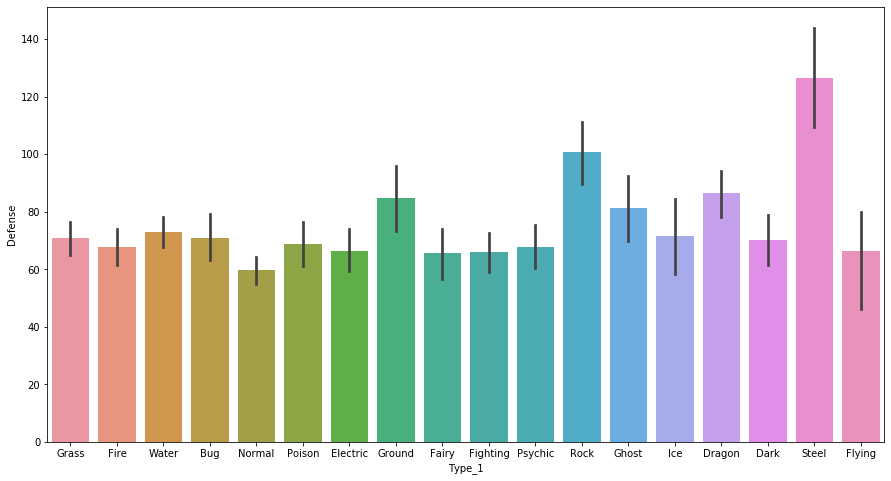

In [55]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_1',y='Defense',data=data)
plt.show()

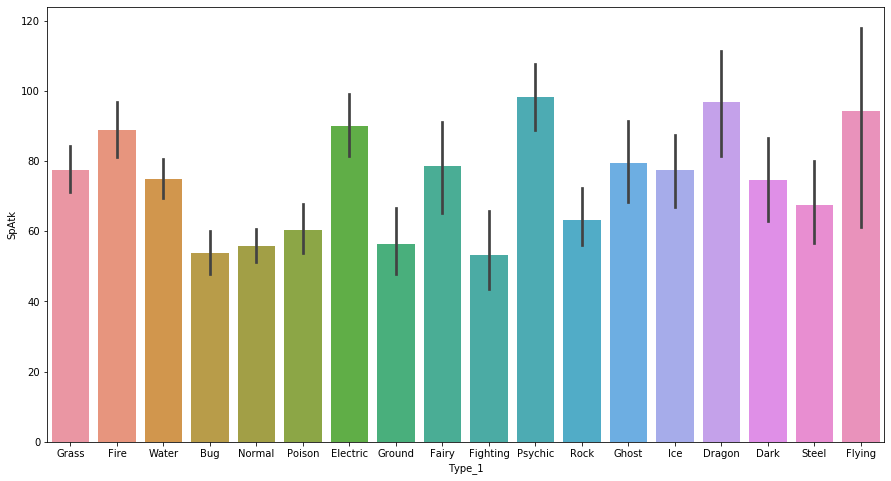

In [56]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_1',y='SpAtk',data=data)
plt.show()

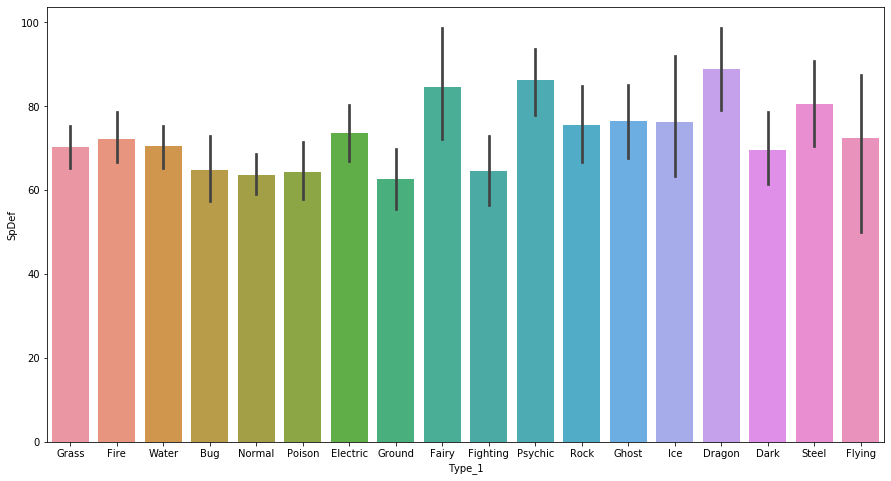

In [57]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_1',y='SpDef',data=data)
plt.show()

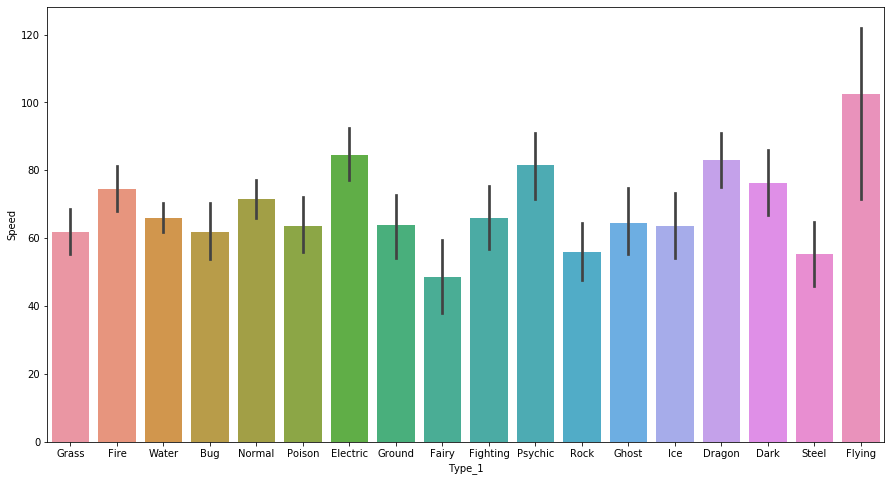

In [58]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_1',y='Speed',data=data)
plt.show()

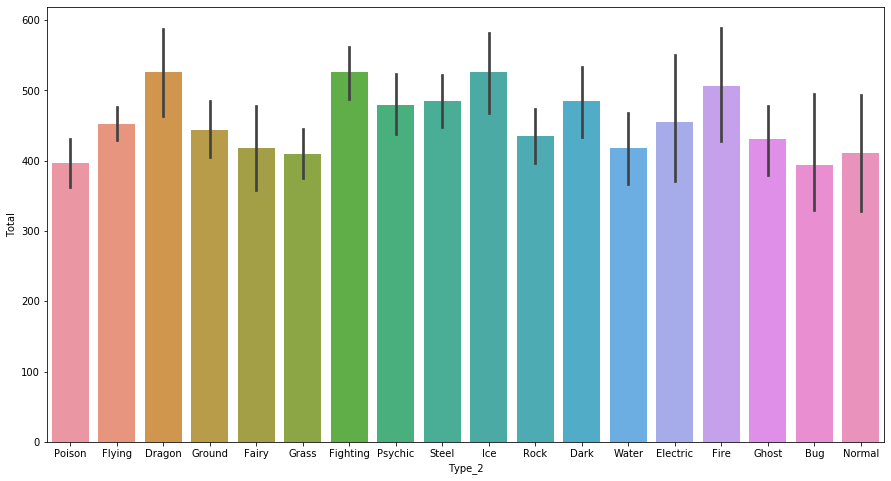

In [59]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_2',y='Total',data=data)
plt.show()

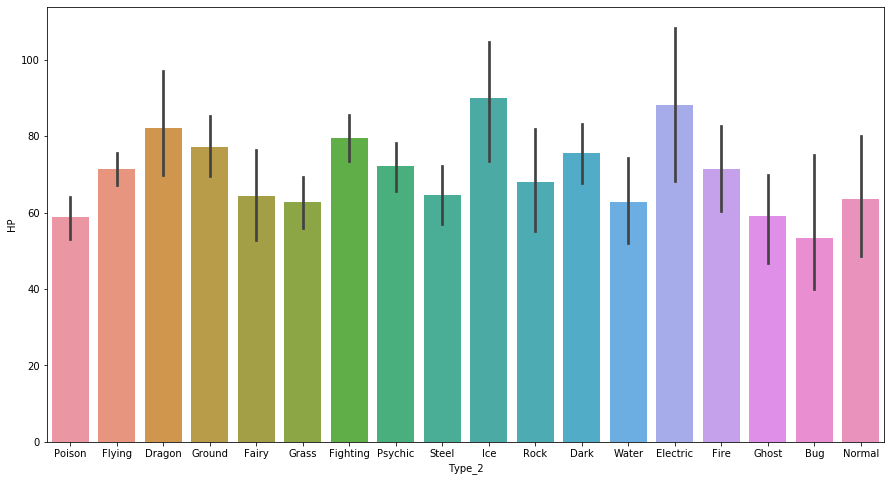

In [60]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_2',y='HP',data=data)
plt.show()

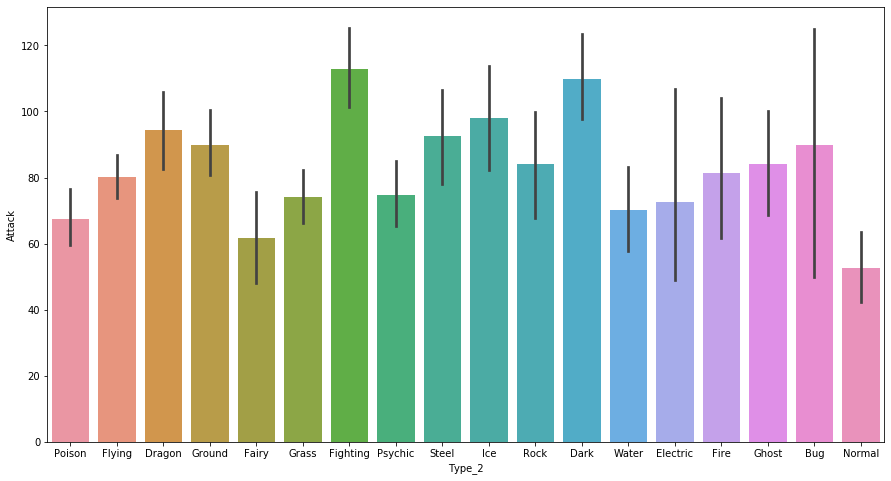

In [61]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_2',y='Attack',data=data)
plt.show()

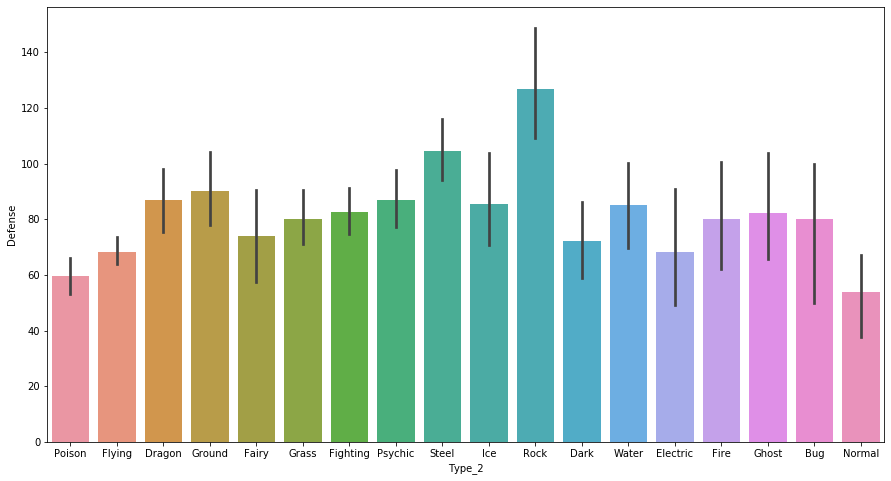

In [62]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_2',y='Defense',data=data)
plt.show()

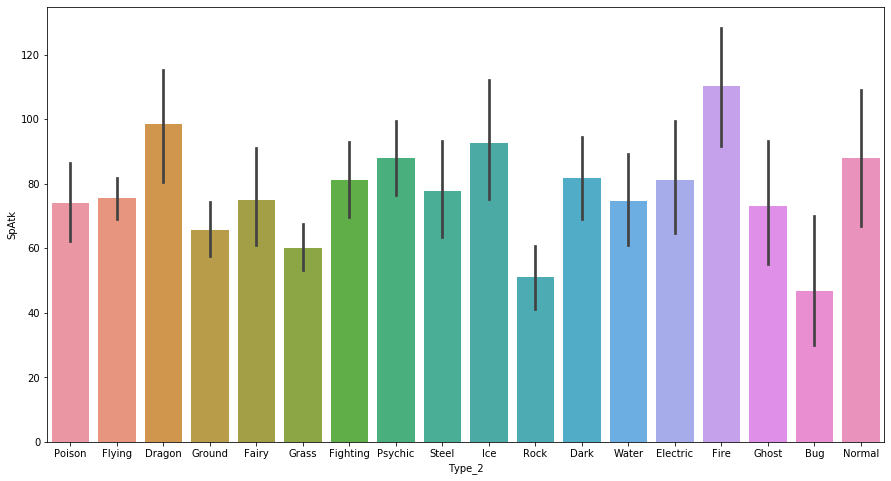

In [63]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_2',y='SpAtk',data=data)
plt.show()

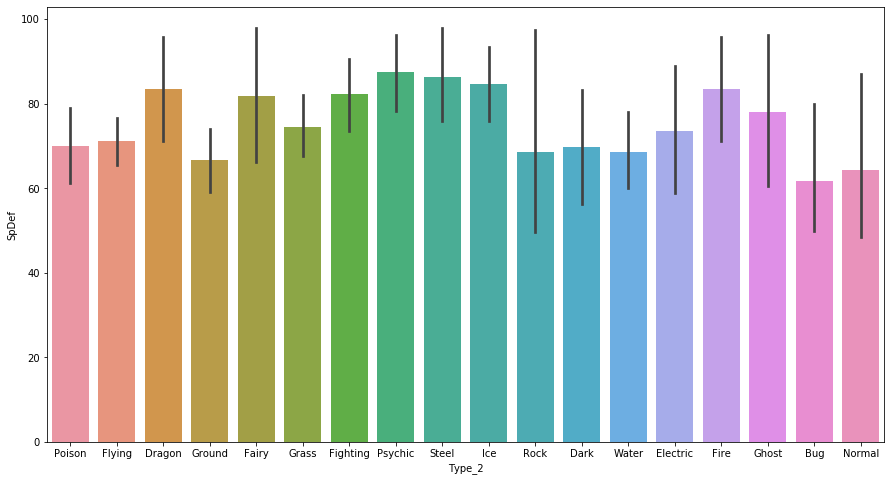

In [64]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_2',y='SpDef',data=data)
plt.show()

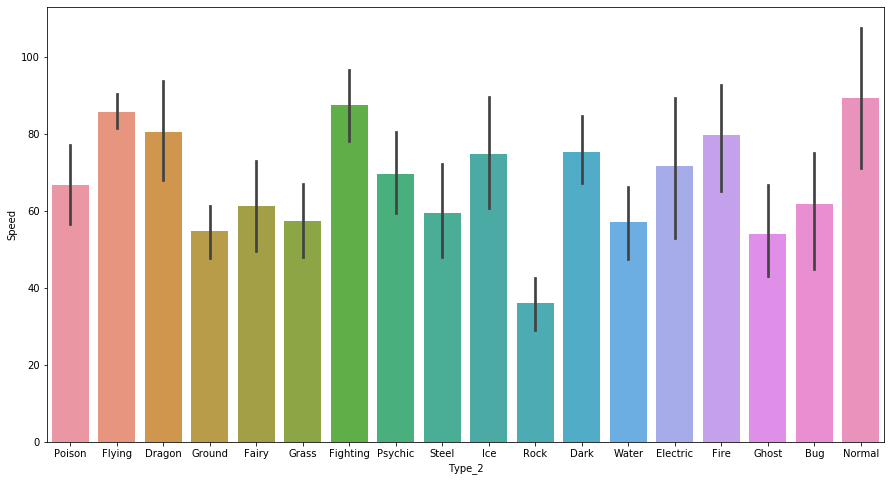

In [65]:
plt.figure (figsize = (15, 8))
sns.barplot(x='Type_2',y='Speed',data=data)
plt.show()

In [26]:
#create a dataset that contains a row for each type each pokemon has
data2 = data[data.Type_2.notna()].copy()
data2.Type1 = data2.Type_2
type_data = pd.concat ([data, data2])

#get a count for each type
type_count = type_data.Type_1.value_counts()
type_count = pd.DataFrame ({'count': type_count})
type_count

,count
Water,165
Normal,135
Bug,121
Grass,107
Rock,79
Fire,76
Psychic,76
Electric,61
Ghost,54
Dragon,53


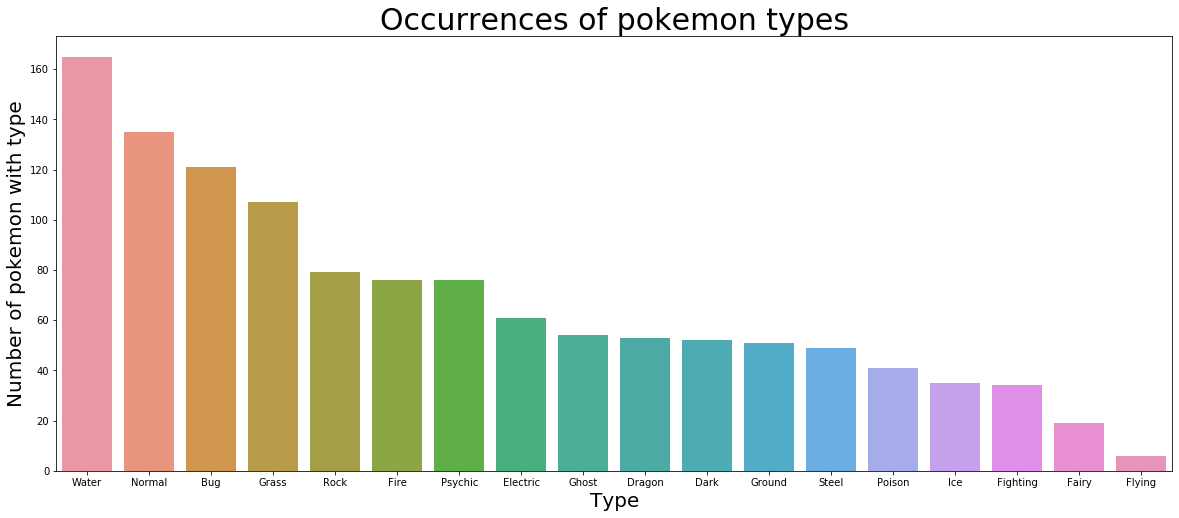

In [27]:
plt.figure (figsize = (20, 8))
sns.barplot (x = type_count.index, y = type_count['count'])
plt.title ('Occurrences of pokemon types', fontdict = {'fontsize': 30})
plt.xlabel ('Type', fontdict = {'fontsize': 20})
plt.ylabel ('Number of pokemon with type', fontdict = {'fontsize': 20})
plt.show()

In [29]:
#create a dataset that has totals for each pokemon type in each generation
generations_types = type_data.groupby (['Generation']).Type_1.value_counts()
generations_types = pd.DataFrame ({'count': generations_types})
generations_types['generation'] = generations_types.index.get_level_values(0)
generations_types['type'] = generations_types.index.get_level_values(1)
generations_types.reset_index(drop = True, inplace = True)
generations_types

,count,generation,type
0,43,1,Water
1,35,1,Normal
2,25,1,Bug
3,25,1,Grass
4,20,1,Rock
...,...,...,...
93,5,6,Fighting
94,4,6,Bug
95,4,6,Flying
96,4,6,Poison


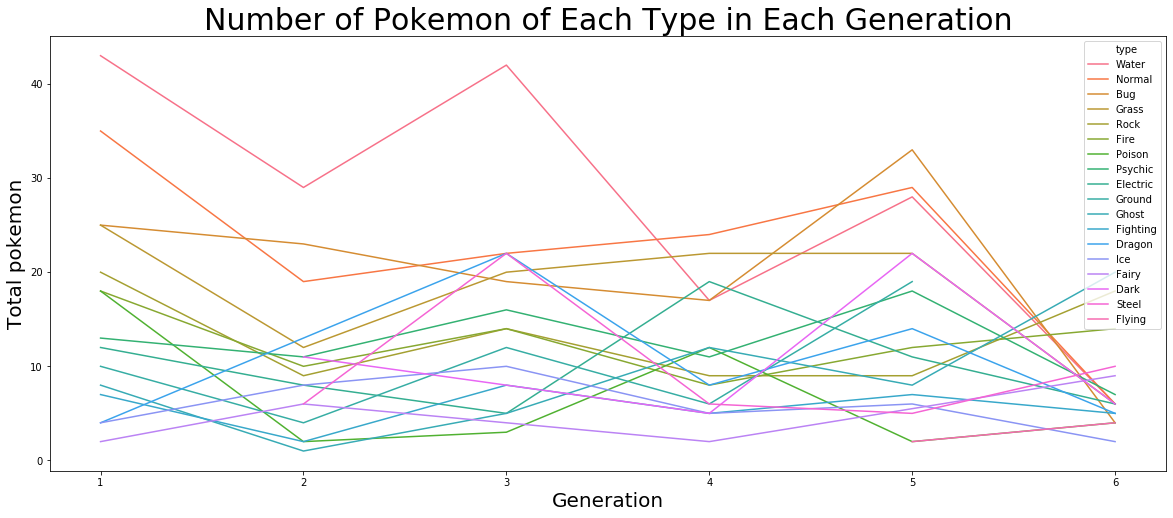

In [31]:
#plot a line graph
plt.figure (figsize = (20, 8))
sns.lineplot (x = generations_types['generation'], y = generations_types['count'], hue = generations_types['type'])
plt.title ('Number of Pokemon of Each Type in Each Generation', fontdict = {'fontsize': 30})
plt.xlabel ('Generation', fontdict = {'fontsize': 20})
plt.ylabel ('Total pokemon', fontdict = {'fontsize': 20})
plt.show()

In [32]:
type_combos = data.groupby (['Type_1', 'Type_2']).size().unstack()
for col in type_combos.columns:
    type_combos[col] = type_combos[col].fillna(0)
    
type_combos

Type_2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type_1,,,,,,,,,,,,,,,,,,
Bug,0.0,0.0,0.0,2.0,0.0,2.0,2.0,14.0,1.0,6.0,2.0,0.0,0.0,12.0,0.0,3.0,7.0,1.0
Dark,0.0,0.0,3.0,0.0,0.0,2.0,3.0,5.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0
Dragon,0.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0,0.0,0.0,5.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0
Electric,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0
Fairy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fighting,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0
Fire,0.0,0.0,1.0,0.0,0.0,7.0,0.0,6.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0
Flying,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghost,0.0,1.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,10.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


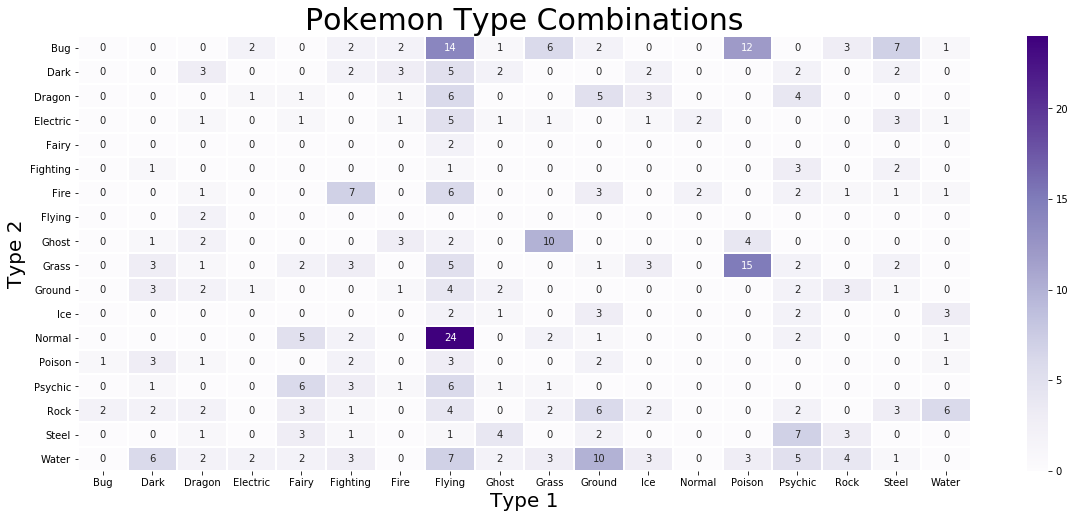

In [33]:
plt.figure (figsize = (20, 8))
sns.heatmap (data = type_combos, annot = True, linewidths = 1, cmap = 'Purples')
plt.title ('Pokemon Type Combinations', fontdict = {'fontsize': 30})
plt.xlabel ('Type 1', fontdict = {'fontsize': 20})
plt.ylabel ('Type 2', fontdict = {'fontsize': 20})
plt.show()

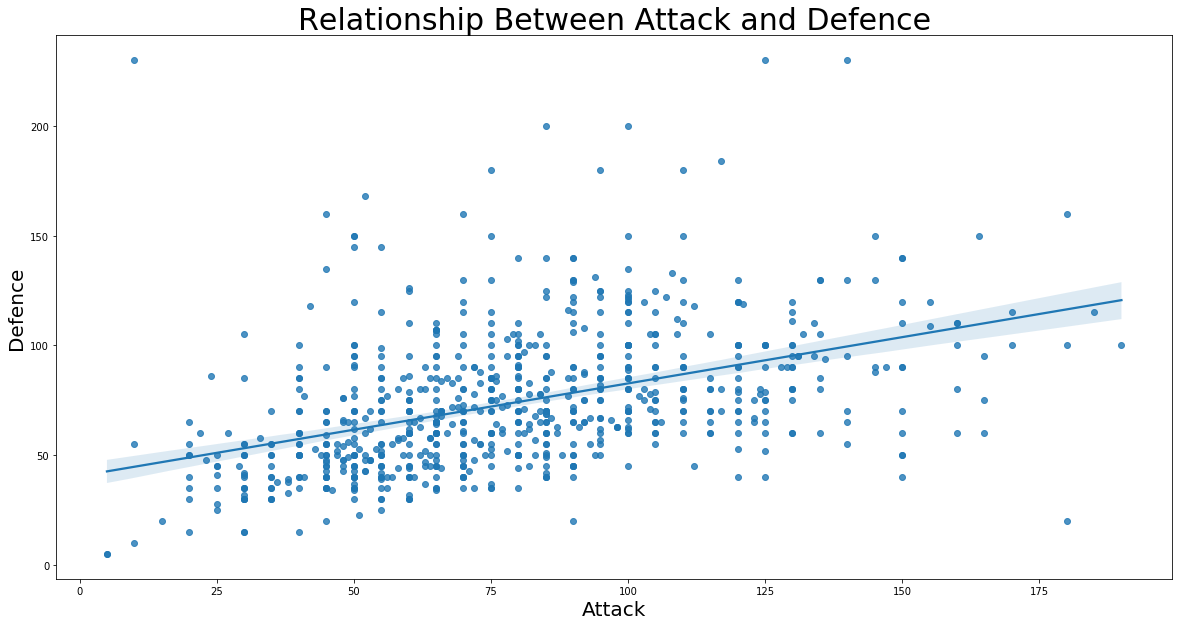

In [35]:
plt.figure (figsize = (20, 10))
sns.regplot (x = data.Attack, y = data.Defense)
plt.title ('Relationship Between Attack and Defence', fontdict = {'fontsize': 30})
plt.xlabel ('Attack', fontdict = {'fontsize': 20})
plt.ylabel ('Defence', fontdict = {'fontsize': 20})
plt.show()

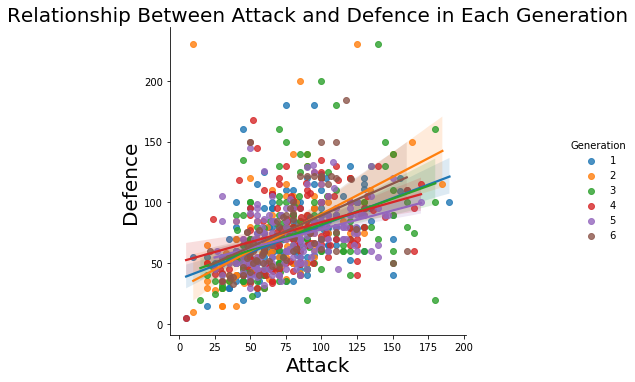

In [37]:
sns.lmplot (data = data, x = 'Attack', y = 'Defense', hue = 'Generation')
plt.title ('Relationship Between Attack and Defence in Each Generation', fontdict = {'fontsize': 20})
plt.xlabel ('Attack', fontdict = {'fontsize': 20})
plt.ylabel ('Defence', fontdict = {'fontsize': 20})
plt.show()

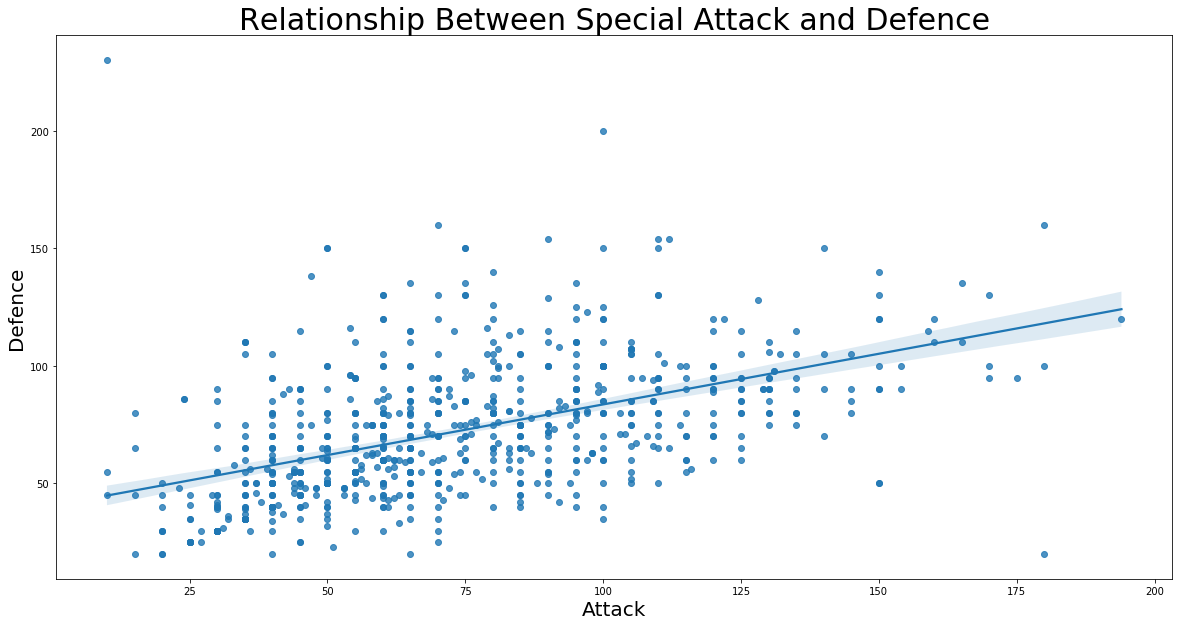

In [48]:
plt.figure (figsize = (20, 10))
sns.regplot (x = data.SpAtk, y = data.SpDef)
plt.title ('Relationship Between Special Attack and Defence', fontdict = {'fontsize': 30})
plt.xlabel ('Attack', fontdict = {'fontsize': 20})
plt.ylabel ('Defence', fontdict = {'fontsize': 20})
plt.show()

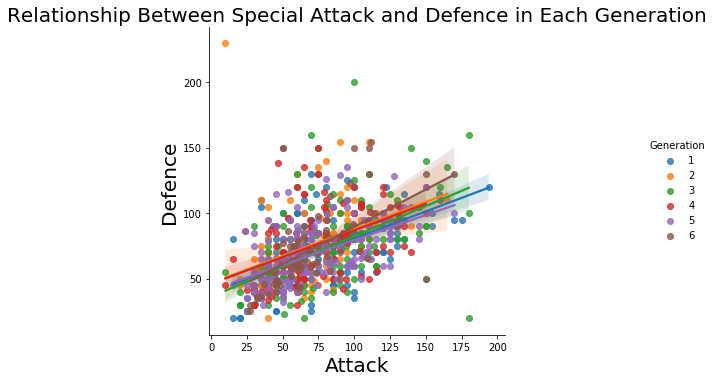

In [47]:
sns.lmplot (data = data, x = 'SpAtk', y = 'SpDef', hue = 'Generation')
plt.title ('Relationship Between Special Attack and Defence in Each Generation', fontdict = {'fontsize': 20})
plt.xlabel ('Attack', fontdict = {'fontsize': 20})
plt.ylabel ('Defence', fontdict = {'fontsize': 20})
plt.show()

## classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV 

In [69]:
# Let's find out whether there is missing data or not...
data.isna().sum()

Name            0
Type_1          0
Type_2        386
Total           0
HP              0
Attack          0
Defense         0
SpAtk           0
SpDef           0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [70]:
# Lets Check the missing values...
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [71]:
# Fill them..
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data[label] = content.fillna(content.median())
            

In [72]:
data.dtypes


Name          object
Type_1        object
Type_2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
SpAtk          int64
SpDef          int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [73]:
for label,content in data.items():
    if pd.api.types.is_float_dtype(content):
        data[label] = data[label].astype('int')

In [74]:
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = data[label].astype('category')

In [75]:
for label,content in data.items():
    if pd.api.types.is_categorical_dtype(content):
        data[label] = pd.Categorical(content).codes + 1

In [76]:
X = data.drop('Legendary',axis=1)
y = data['Legendary']

In [77]:
model_a = RandomForestClassifier()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model_a.fit(X_train,y_train)
model_a.score(X_test,y_test)

0.95

In [78]:
model_b = GradientBoostingClassifier()
model_b.fit(X_train,y_train)
model_b.score(X_test,y_test)

0.95625

In [79]:
model_c = LogisticRegression()
model_c.fit(X_train,y_train)
model_c.score(X_test,y_test)

0.89375

In [80]:
# Lets check the cross val score
y_preds = model_a.predict_proba(X_test)
cvm = cross_val_score(model_a,X,y,cv=10)
np.mean(cvm)

0.9362499999999999

In [81]:
# Classification metrics :
y_preds = model_a.predict(X_test)

precision = precision_score(y_test,y_preds)
recall = recall_score(y_test,y_preds)
accuracy = accuracy_score(y_test,y_preds)
accuracy,recall,precision

(0.95, 0.5625, 0.9)

In [83]:
Pokemon = pd.DataFrame()
y_preds = model_a.predict(X)
Pokemon['Default values'] = y
Pokemon['Predictions'] = y_preds
Pokemon

,Default values,Predictions
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
795,True,True
796,True,True
797,True,True
798,True,True


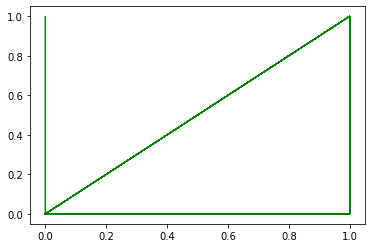

In [84]:
fig,axes = plt.subplots()
axes.stackplot(Pokemon['Default values'],Pokemon['Predictions'],color=['green','blue']);